# **Metode K-Nearest Neighbor**

Tugas 3

Senin, 12 September 2022

K-Nearest Neighbor (KNN) adalah suatu metode yang menggunakan algoritma supervised dimana hasil dari query instance yang baru diklasifikan berdasarkan mayoritas dari kategori pada KNN. Tujuan dari algoritma KNN adalah untuk mengklasifikasi objek baru berdasarkan atribut dan training samples. Dimana hasil dari sampel uji yang baru diklasifikasikan berdasarkan mayoritas dari kategori pada KNN.

Langkah-Langkah Algoritma KNN
Langkah-langkah pada algoritma KNN:

1. Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas.
2. Hitung jarak dari data baru ke masing-masing data point di dataset.
Ambil sejumlah K data dengan jarak terdekat, kemudian tentukan kelas dari data baru tersebut.
3. Untuk mencari dekat atau jauhnya jarak antar titik pada kelas k biasanya dihitung menggunakan jarak Euclidean. Jarak Euclidean adalah formula untuk mencari jarak antara 2 titik dalam ruang dua dimensi. Berikut rumus untuk menghitung jarak Euclidean:



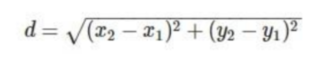

langkah 1 : mengimport data yang diperlukan dan memeriksa fitur-fiturnya

In [ ]:
# Data in a csv format, each observation has a 4 measurements/features 
# and the species type.
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=400, height=200)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#untuk membaca dataset
url = "https://raw.githubusercontent.com/alisaSugiarti/datamining/main/IRIS.csv"
iris = pd.read_csv(url)
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(iris.data.shape)
X=iris.data
y=iris.target                                              

(150, 4)


langkah 2 : memisahkan data dan latih model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
# shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0, 0.5, 'Testing Accuracy')

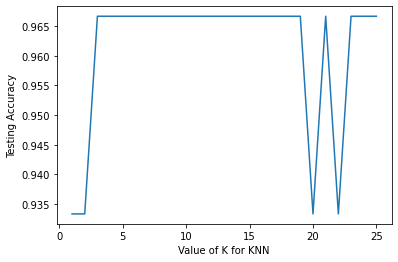

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Nilai K dengan 3 hingga 19 memiliki akurasi yang sama yaitu 96,66, jadi kita dapat menggunakan salah satu nilai dari itu, disini menggunakan K sebagai 5 dan melatih model dengan data pelatihan penuh

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])


versicolor
setosa
